# Electric Trucks Portfolio


https://en.wikipedia.org/wiki/Electric_truck

https://investorplace.com/2021/07/7-best-ev-stocks-to-buy-to-get-ahead-of-the-coming-electric-pickup-truck-boom/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY', 'HYLN','F','RIDE','ARVL', 'CHPT', 'TPGY']
start = '2021-01-20'
end = '2022-03-25'

title = 'Electric Trucks'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  7 of 7 completed


,ARVL,CHPT,F,HYLN,RIDE,SPY,TPGY
Date,,,,,,,
2021-01-20,28.790001,39.369999,10.750319,16.629999,23.270000,377.666870,26.139999
2021-01-21,28.230000,40.299999,11.413552,17.530001,24.010000,378.011169,25.030001
2021-01-22,28.280001,39.619999,11.403655,17.389999,23.660000,376.673248,26.100000
2021-01-25,26.610001,38.680000,11.175977,17.230000,23.209999,378.158783,24.180000
2021-01-26,27.799999,41.270000,11.076986,19.430000,26.450001,377.568481,29.219999


In [3]:
df.tail()

,ARVL,CHPT,F,HYLN,RIDE,SPY,TPGY
Date,,,,,,,
2022-03-18,3.73,18.440001,16.860001,4.41,2.80,444.519989,9.87
2022-03-21,3.59,18.129999,16.480000,4.33,2.76,444.390015,9.88
2022-03-22,3.91,18.440001,17.090000,4.49,2.93,449.589996,9.87
2022-03-23,3.81,18.480000,16.680000,4.38,2.96,443.799988,9.89
2022-03-24,4.10,18.750000,16.830000,4.54,3.21,450.489990,9.89


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

1 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
ARVL: 16700.0
CHPT: 16700.0
F: 16700.0
HYLN: 16700.0
RIDE: 16700.0
SPY: 16700.0


In [8]:
print('Number of Shares:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
ARVL: 580
CHPT: 424
F: 1553
HYLN: 1004
RIDE: 717
SPY: 44


In [9]:
print('Beginning Value:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
ARVL: $16698.2
CHPT: $16692.88
F: $16695.25
HYLN: $16696.52
RIDE: $16684.59
SPY: $16617.34


In [10]:
print('Current Value:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
ARVL: $2378.0
CHPT: $7950.0
F: $26136.99
HYLN: $4558.16
RIDE: $2301.57
SPY: $19821.56


In [11]:
result = []
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $63146.28


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: ARVL: -85.76%
Holding Period Return: CHPT: -52.370000000000005%
Holding Period Return: F: 56.55%
Holding Period Return: HYLN: -72.7%
Holding Period Return: RIDE: -86.21%
Holding Period Return: SPY: 19.28%
Holding Period Return: TPGY: -62.17%


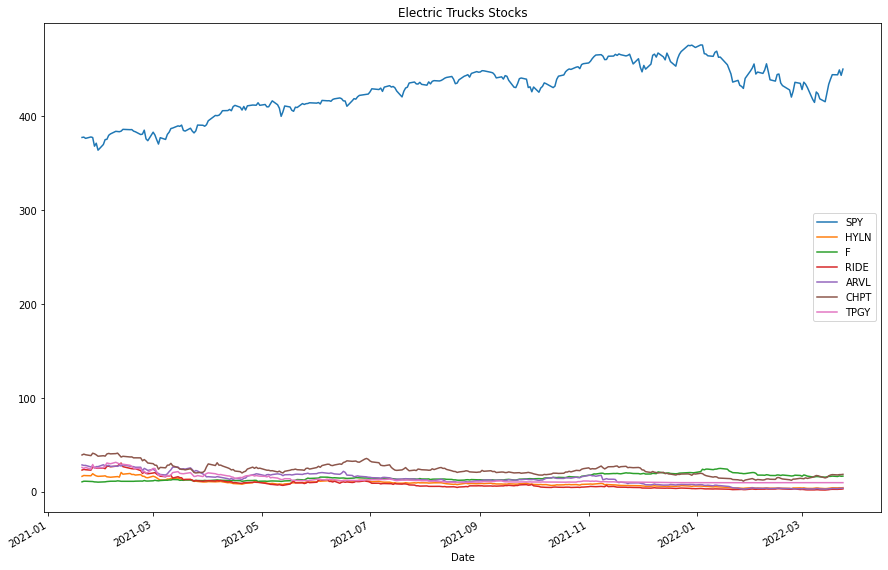

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title(title + ' Stocks')
plt.legend()

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

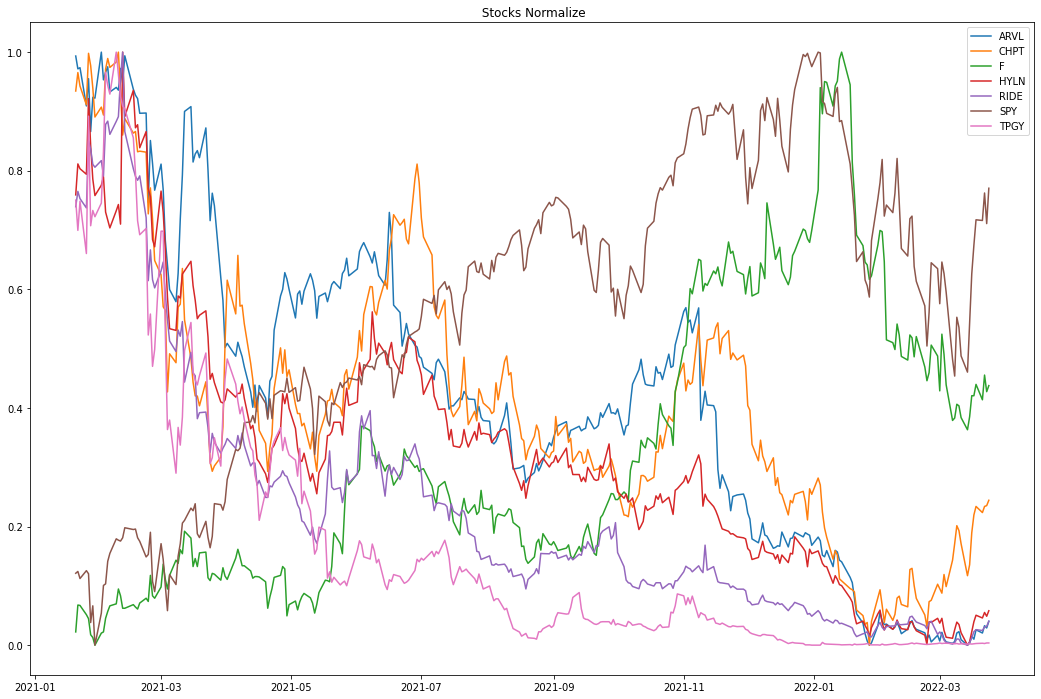

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [16]:
df.min()

ARVL      3.060000
CHPT     11.450000
F        10.423653
HYLN      3.540000
RIDE      2.050000
SPY     364.070892
TPGY      9.810000
dtype: float64

In [17]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 476.23052978515625
HYLN: 20.780000686645508
F: 25.0611515045166
RIDE: 30.75
ARVL: 28.959999084472656
CHPT: 41.33000183105469
TPGY: 31.56999969482422


In [18]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,HYLN Return,F Return,RIDE Return,ARVL Return,CHPT Return,TPGY Return
Date,,,,,,,
2021-01-21,0.000912,0.054119,0.061694,0.031801,-0.019451,0.023622,-0.042464
2021-01-22,-0.003539,-0.007986,-0.000867,-0.014577,0.001771,-0.016873,0.042749
2021-01-25,0.003944,-0.009201,-0.019965,-0.019019,-0.059052,-0.023725,-0.073563
2021-01-26,-0.001561,0.127684,-0.008857,0.139595,0.044720,0.066960,0.208437


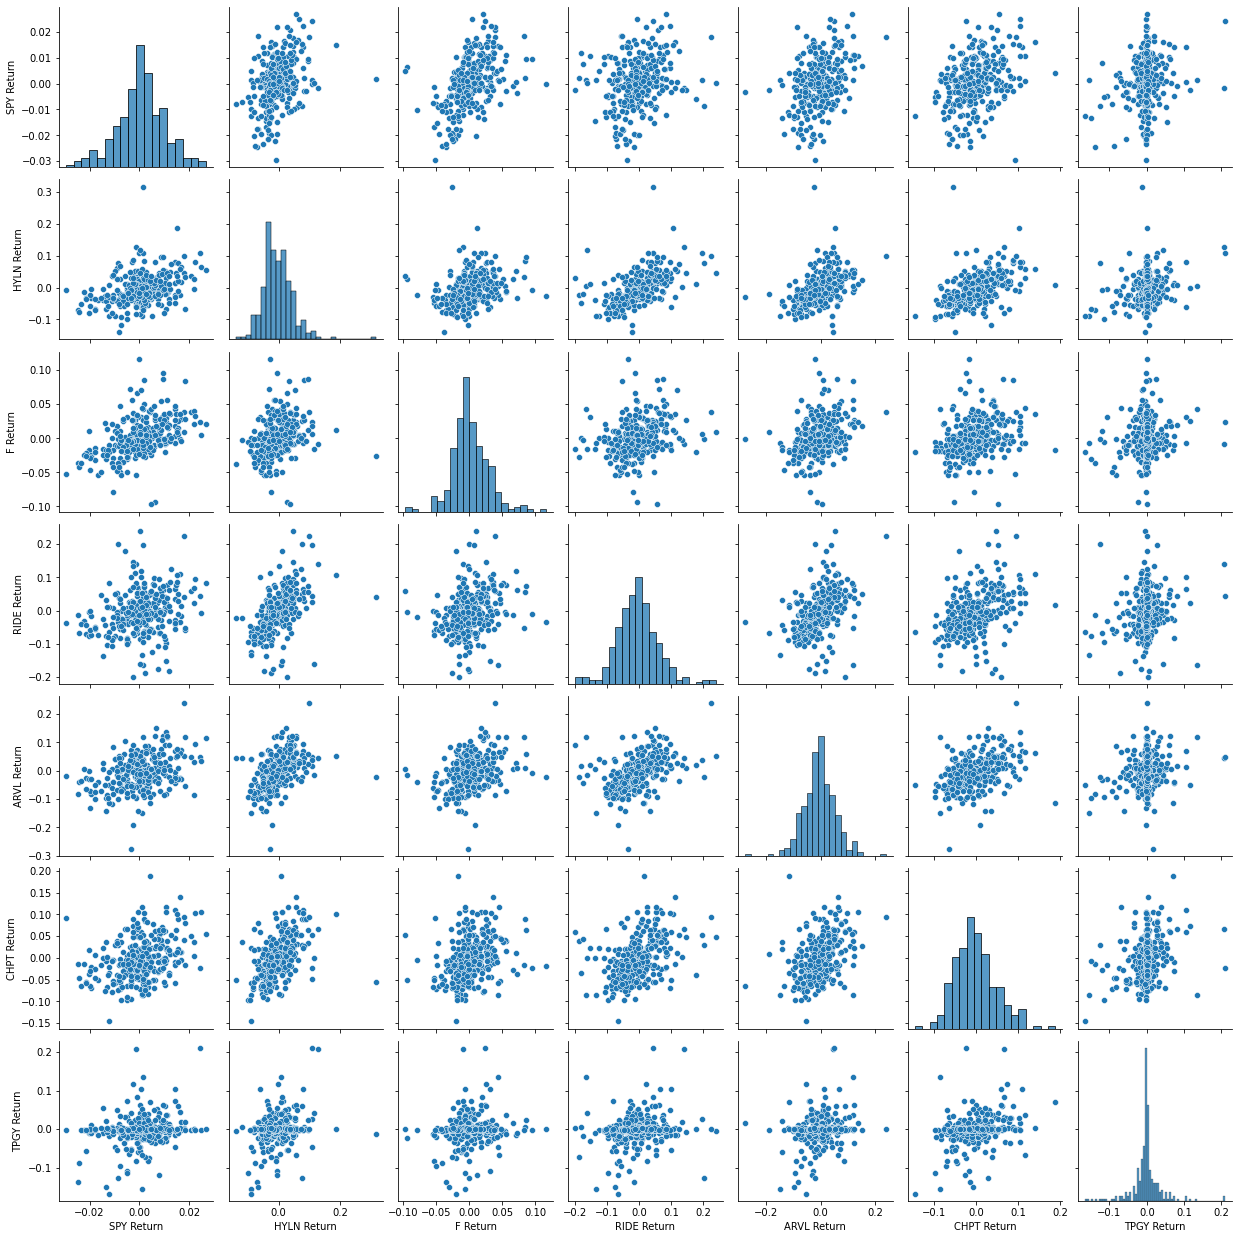

In [19]:
sns.pairplot(returns[1:] )

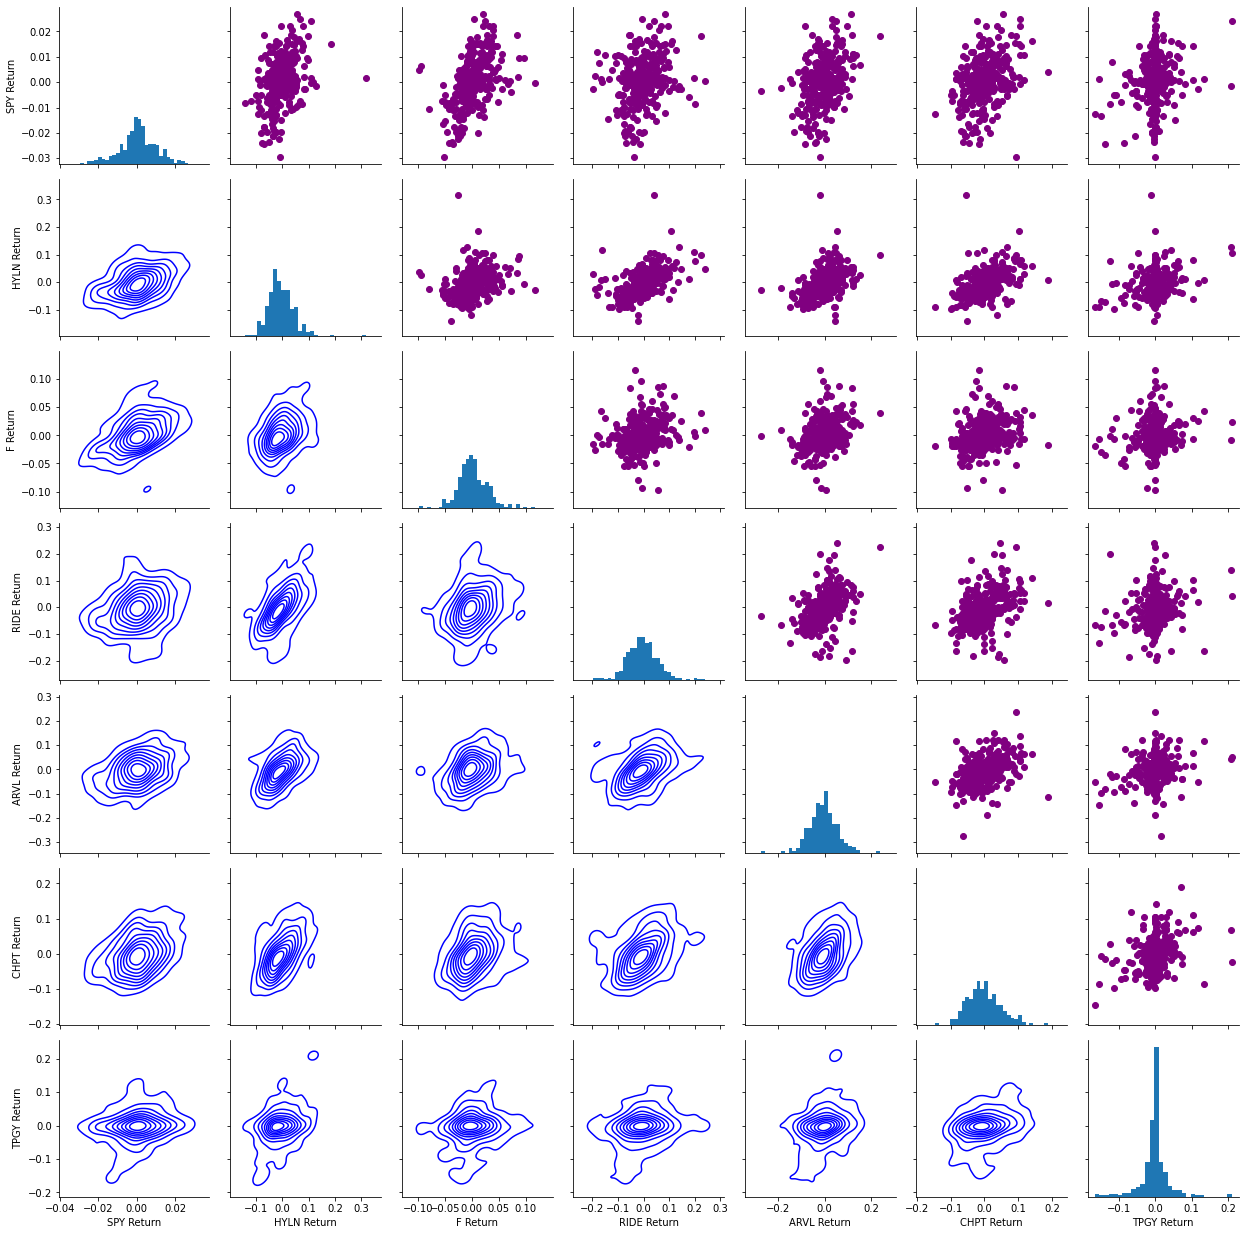

In [20]:
nplot = len(returns.columns)

ax = sns.PairGrid(returns)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

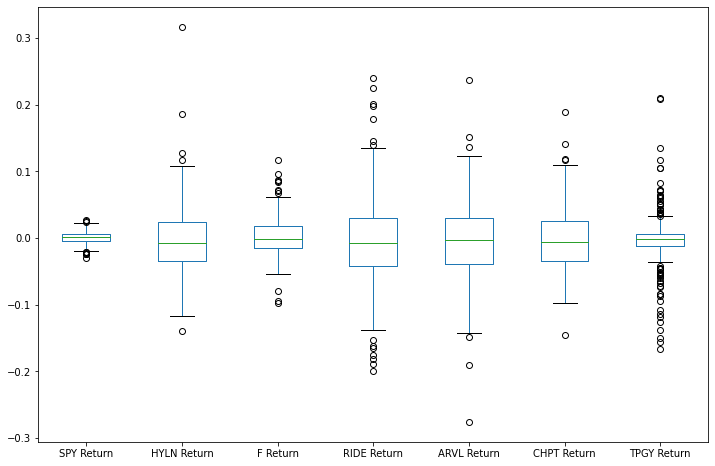

In [21]:
returns.plot(kind='box',figsize=(12,8))

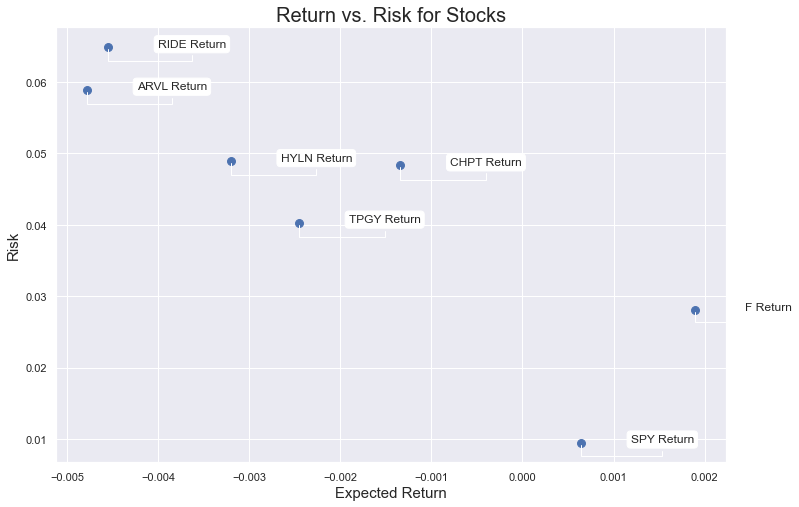

In [22]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [23]:
table = pd.DataFrame()
table['Average Returns'] = returns.mean()
table['Minimum Returns'] = returns.min()
table['Maximum Returns'] = returns.max()
table['Median Returns'] = returns.median()
table['Risk'] = returns.std()
table.sort_values(by='Average Returns')

,Average Returns,Minimum Returns,Maximum Returns,Median Returns,Risk
ARVL Return,-0.004782,-0.275998,0.237342,-0.002774,0.058919
RIDE Return,-0.004551,-0.199377,0.239209,-0.007752,0.064874
HYLN Return,-0.003204,-0.139614,0.316857,-0.007958,0.048927
TPGY Return,-0.002455,-0.166510,0.210068,-0.001014,0.040309
CHPT Return,-0.001343,-0.145429,0.188780,-0.005618,0.048327
SPY Return,0.000639,-0.029479,0.026811,0.000900,0.009514
F Return,0.001899,-0.097034,0.116674,-0.001251,0.028021


In [24]:
table.sort_values(by='Risk')

,Average Returns,Minimum Returns,Maximum Returns,Median Returns,Risk
SPY Return,0.000639,-0.029479,0.026811,0.000900,0.009514
F Return,0.001899,-0.097034,0.116674,-0.001251,0.028021
TPGY Return,-0.002455,-0.166510,0.210068,-0.001014,0.040309
CHPT Return,-0.001343,-0.145429,0.188780,-0.005618,0.048327
HYLN Return,-0.003204,-0.139614,0.316857,-0.007958,0.048927
ARVL Return,-0.004782,-0.275998,0.237342,-0.002774,0.058919
RIDE Return,-0.004551,-0.199377,0.239209,-0.007752,0.064874


In [25]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return    2022-03-09
HYLN Return   2021-02-11
F Return      2022-01-04
RIDE Return   2021-11-11
ARVL Return   2022-01-31
CHPT Return   2021-03-31
TPGY Return   2021-03-01
dtype: datetime64[ns]


In [26]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return    2022-03-07
HYLN Return   2021-11-10
F Return      2022-02-04
RIDE Return   2022-02-28
ARVL Return   2021-11-09
CHPT Return   2021-03-04
TPGY Return   2021-03-04
dtype: datetime64[ns]


In [27]:
returns.corr()

,SPY Return,HYLN Return,F Return,RIDE Return,ARVL Return,CHPT Return,TPGY Return
SPY Return,1.000000,0.373283,0.451116,0.228791,0.369924,0.346060,0.212425
HYLN Return,0.373283,1.000000,0.271455,0.542809,0.446804,0.482383,0.267566
F Return,0.451116,0.271455,1.000000,0.250070,0.335679,0.270395,0.144281
RIDE Return,0.228791,0.542809,0.250070,1.000000,0.408304,0.413053,0.181214
ARVL Return,0.369924,0.446804,0.335679,0.408304,1.000000,0.405655,0.231683
CHPT Return,0.346060,0.482383,0.270395,0.413053,0.405655,1.000000,0.294069
TPGY Return,0.212425,0.267566,0.144281,0.181214,0.231683,0.294069,1.000000


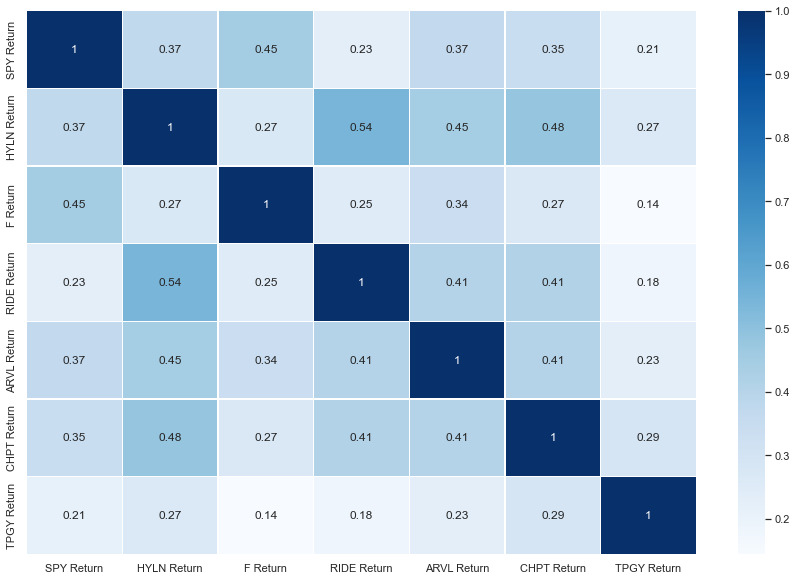

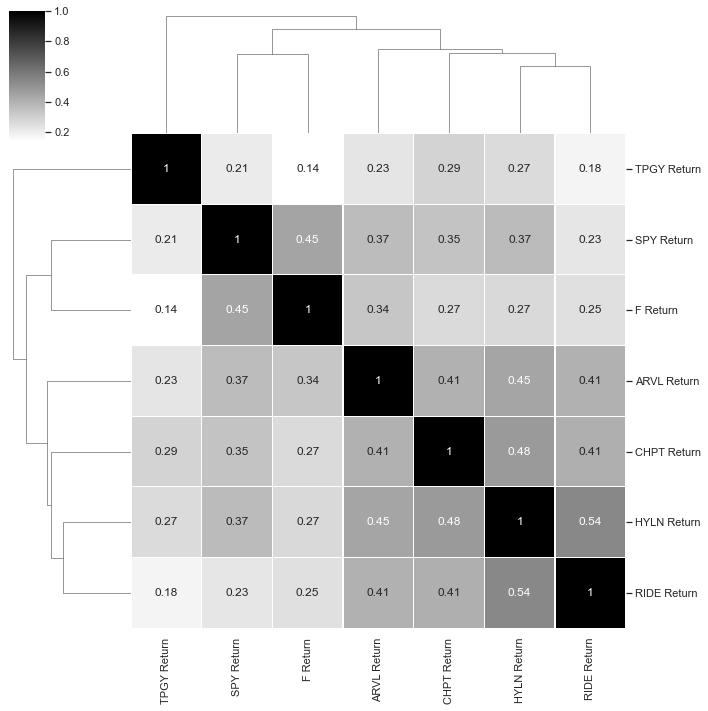

In [28]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

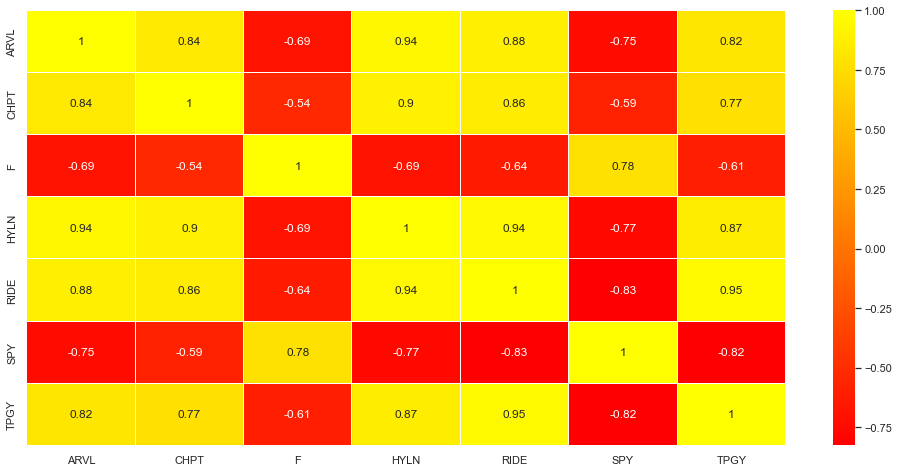

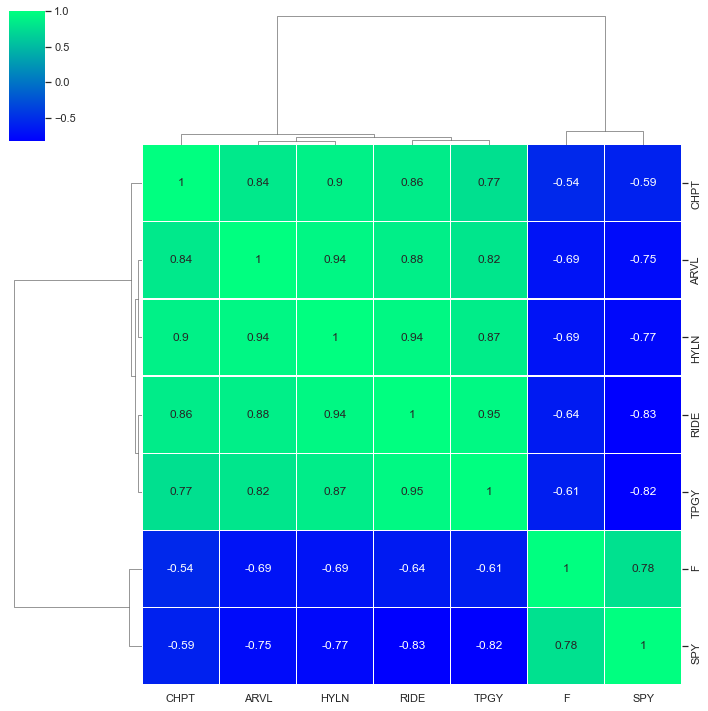

In [29]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [30]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [31]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [32]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.08016215 -0.06317186 -0.03395102 -0.06580093 -0.0875509  -0.01153275
                     -0.0540257 ]
95%                 [-0.10153151 -0.08069941 -0.04411394 -0.08354636 -0.11108022 -0.01498327
                     -0.06864524]
99%                 [-0.14161687 -0.11357817 -0.06317788 -0.11683383 -0.15521731 -0.02145588
                     -0.09606906]


In [33]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
ARVL: -0.0802
CHPT: -0.0632
F: -0.034
HYLN: -0.0658
RIDE: -0.0876
SPY: -0.0115
TPGY: -0.054


In [34]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
ARVL: $8019.999999999999
CHPT: $6320.000000000001
F: $3400.0000000000005
HYLN: $6580.0
RIDE: $8760.0
SPY: $1150.0
TPGY: $5400.0


In [35]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
ARVL: $14160.0
CHPT: $11360.0
F: $6320.000000000001
HYLN: $11680.0
RIDE: $15520.0
SPY: $2150.0
TPGY: $9610.0
